In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


In [27]:
data = pd.read_csv("~/Desktop/NCSA_genomics/onePersonData.txt", sep="\t")
data.head()

,Display Time,GlucoseValue,subjectId,Internal Time
0,2014-02-03 03:42:12,93,1636-69-001,2016-02-03 00:05:23
1,2014-02-03 03:47:12,93,1636-69-001,2016-02-03 00:10:23
2,2014-02-03 03:52:12,93,1636-69-001,2016-02-03 00:15:23
3,2014-02-03 03:57:12,95,1636-69-001,2016-02-03 00:20:23
4,2014-02-03 04:02:12,96,1636-69-001,2016-02-03 00:25:23


In [28]:
#df.drop(['subjectId', 'Internal Time'], axis=1, inplace=True)
#df['Display Time'] = pd.datetime.strptime(df['Display Time'], '%y-%m-%d %H:%M:%S')
df = data['GlucoseValue']
df.index = data['Display Time']
df.head(10)

Display Time
2014-02-03 03:42:12    93
2014-02-03 03:47:12    93
2014-02-03 03:52:12    93
2014-02-03 03:57:12    95
2014-02-03 04:02:12    96
2014-02-03 04:07:12    95
2014-02-03 04:12:12    95
2014-02-03 04:17:12    95
2014-02-03 04:22:12    96
2014-02-03 04:27:12    97
Name: GlucoseValue, dtype: int64

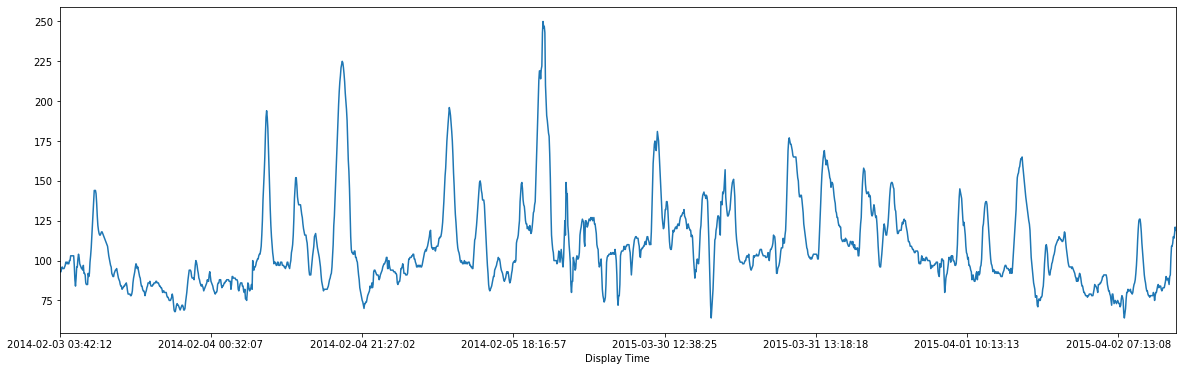

In [30]:
plt.figure(figsize=(20, 6))
df.plot()

In [42]:
split_index = '2015-04-01 10:13:13'
train = df.loc[:split_index]
test = df.loc[split_index:]
#plt.figure(figsize=(20, 7))
#ax = train.plot()
#test.plot(ax=ax)
#plt.legend(['train', 'test']);

In [43]:
print(train)

Display Time
2014-02-03 03:42:12     93
2014-02-03 03:47:12     93
2014-02-03 03:52:12     93
2014-02-03 03:57:12     95
2014-02-03 04:02:12     96
                      ... 
2015-04-01 09:48:13    120
2015-04-01 09:58:13    116
2015-04-01 10:03:13    109
2015-04-01 10:08:13    105
2015-04-01 10:13:13    104
Name: GlucoseValue, Length: 1501, dtype: int64


In [44]:
print(test)

Display Time
2015-04-01 10:13:13    104
2015-04-01 10:18:13    101
2015-04-01 10:23:13    102
2015-04-01 10:28:13     97
2015-04-01 10:33:13     97
                      ... 
2015-04-02 14:48:06    115
2015-04-02 14:53:06    114
2015-04-02 14:58:06    117
2015-04-02 15:03:06    121
2015-04-02 15:08:06    119
Name: GlucoseValue, Length: 346, dtype: int64


In [50]:
train_df = pd.DataFrame(train, columns=['Y'], index=train.index)
test_df = pd.DataFrame(test, columns=['Y'], index=test.index)

for s in range(1,2):
    train_df['X_{}'.format(s)] = train_df['Y'].shift(s)
    test_df['X_{}'.format(s)] = test_df['Y'].shift(s)

X_train = train_df.dropna().drop('Y', axis=1)
y_train = train_df.dropna().drop('X_1', axis=1)

X_test = test_df.dropna().drop('Y', axis=1)
y_test = test_df.dropna().drop('X_1', axis=1)

X_train = X_train.as_matrix()
y_train = y_train.as_matrix()

X_test = X_test.as_matrix()
y_test = y_test.as_matrix()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [51]:

X_train_lmse = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_lmse = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print('Train shape: ', X_train_lmse.shape)
print('Test shape: ', X_test_lmse.shape)

Train shape:  (0, 1, 1)
Test shape:  (0, 1, 1)
